<a href="https://colab.research.google.com/github/Aravind-98/Summer_Internship_2020/blob/master/Playbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))   

Saving Price_All.csv to Price_All.csv
User uploaded file "Price_All.csv" with length 1527571 bytes


In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

df=pd.read_csv("Price_All.csv")
df.dropna(inplace=True)
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

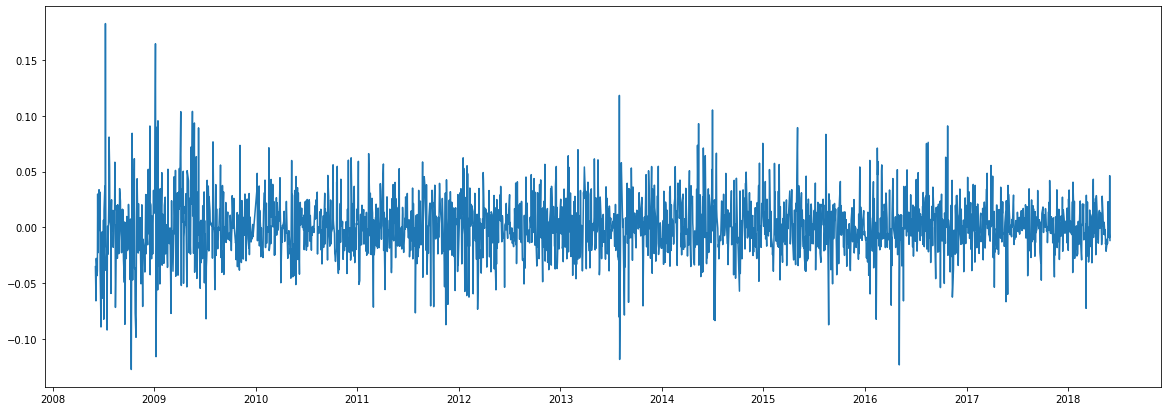

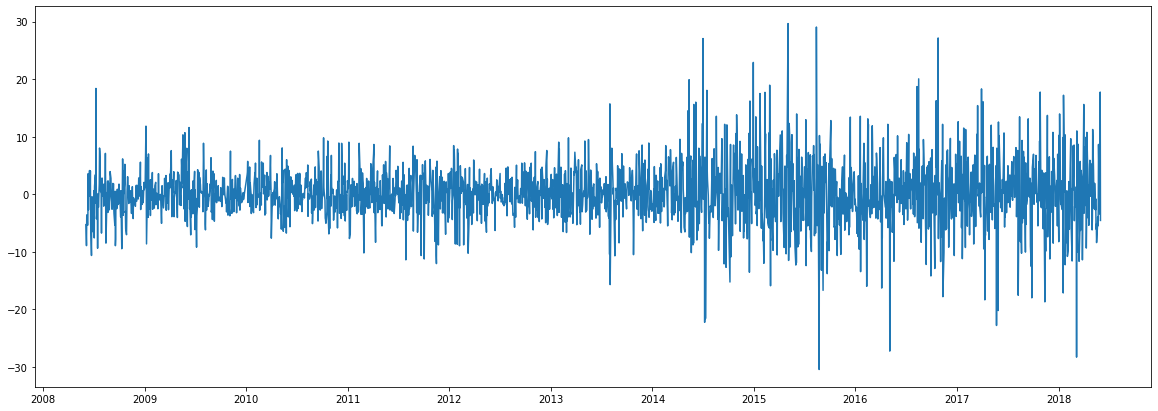

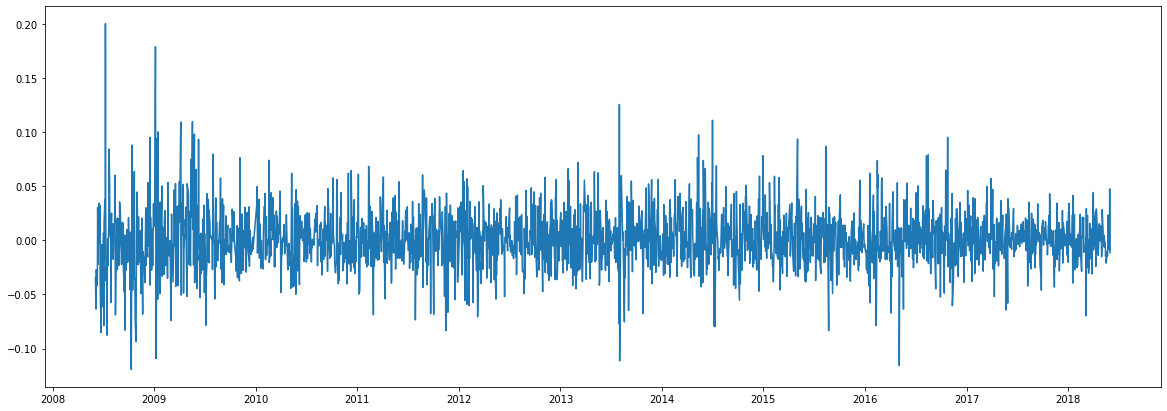

In [0]:
Data=df[df.columns[1:-1]]
net_chg=pd.DataFrame(Data-Data.shift(1)).dropna()
log_return=pd.DataFrame(np.log(Data/Data.shift(1)).dropna())
pct_chg=Data.pct_change(1).dropna()
plt.figure(figsize=(20,7))
plt.plot(log_return['Price_1'])
plt.figure(figsize=(20,7))
plt.plot(net_change['Price_1'])
plt.figure(figsize=(20,7))
plt.plot(pct_chg['Price_1'])

scaler=MinMaxScaler()
std_scaler=StandardScaler()
X_log=scaler.fit_transform(log_return)
X=scaler.fit_transform(Data)
X_pct=scaler.fit_transform(pct_chg)
X_net=scaler.fit_transform(net_chg)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


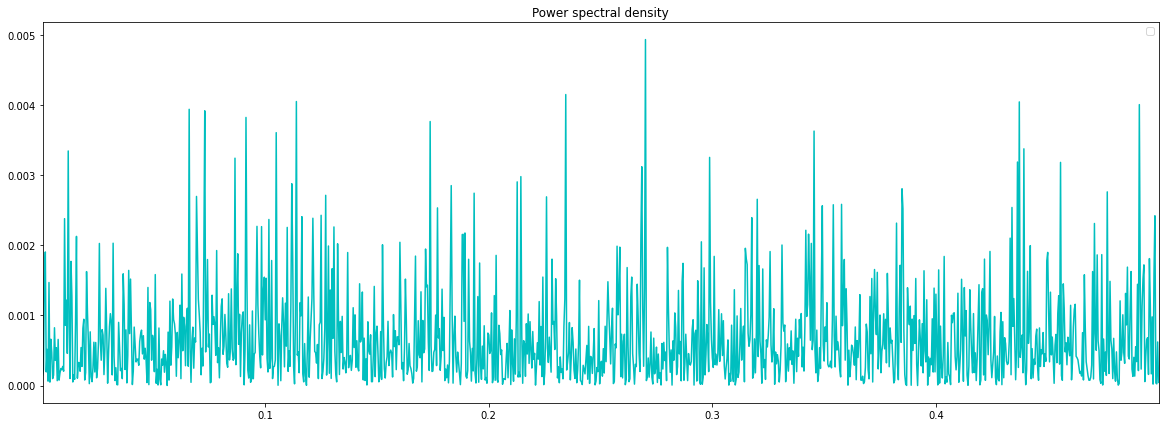

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


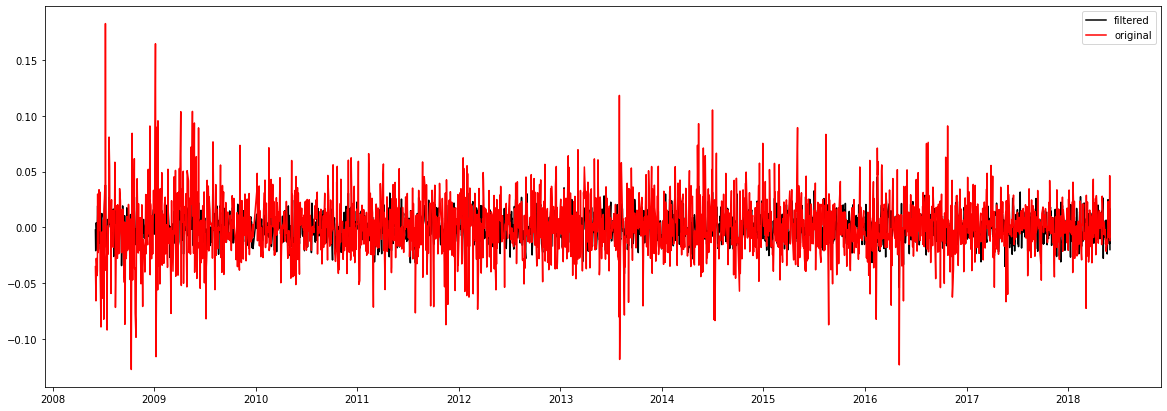

In [0]:
lr_51=log_return['Price_1']
n=len(lr_51)
n
f=np.array(lr_51)
fhat=np.fft.fft(f,n)
PSD=(fhat*np.conj(fhat))/n
freq=(1/n)*np.arange(n)
L=np.arange(1,np.floor(n/2),dtype='int')

plt.figure(figsize=(20,7))
plt.plot(freq[L],PSD[L],color='c')
plt.title("Power spectral density")
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()
plt.show()


indices= PSD > 0.002
PSDclean=PSD*indices
fhat=indices*fhat
ffilt=np.fft.ifft(fhat)
#print(str(ffilt))
plt.figure(figsize=(20,7))
plt.plot(log_return.index,ffilt,color='black',label='filtered')
plt.plot(log_return.index,f,color='red',label='original')
plt.legend()
plt.show()

In [0]:
def temporalize(X, y, lookback):
    output_X = []
    output_y = []
    for i in range(len(X)-lookback-1):
        t = []
        for j in range(1,lookback+1):
            # Gather past records upto the lookback period
            t.append(X[[(i+j+1)], :])
        output_X.append(t)
        output_y.append(y[i+lookback+1])
    return output_X, output_y

In [0]:
#Implementing the seq2seq LSTM autoencoder and extract the top K stocks 
def LSTM_AutoEnc_V_2(X=X):
    from keras.models import Sequential
    from keras.models import Model
    from keras.layers import LSTM, Dropout, SimpleRNN, GRU, Dense, RepeatVector, TimeDistributed
    from keras.utils import plot_model
    from tensorflow.keras.callbacks import EarlyStopping

    Data,_=temporalize(X,X,5)
    Data=np.array(Data)
    Data=np.reshape(Data,(Data.shape[0],Data.shape[1],Data.shape[3]))
    Data.shape

    model = Sequential()
    model.add(LSTM(100, activation='relu', input_shape=(Data.shape[1],Data.shape[2]),return_sequences=True,name='Enc_1'))
    model.add(LSTM(20, activation='relu', return_sequences=False,name='Enc_1_1'))
    model.add(RepeatVector(Data.shape[1]))
    model.add(SimpleRNN(Data.shape[2], activation='relu', return_sequences=True,name='Dec_1'))
    model.add(TimeDistributed(Dense(Data.shape[2],kernel_regularizer='l2'),name='dec_1'))
    model.compile(optimizer='rmsprop', loss='mse')

    hist=model.fit(Data,Data,epochs=100,batch_size=20,callbacks=[EarlyStopping(monitor='loss',patience=5,restore_best_weights=True)],shuffle=False)

    model=Model(inputs=model.inputs, outputs=model.layers[4].output)
    decoded_data=model.predict(Data)
    decoded_data.shape
    return Data,decoded_data

In [0]:
Data,decoded_data=LSTM_AutoEnc(X_net)

Epoch 1/100
2434/2434 [==============================] - 2s 892us/step - loss: 0.2766
Epoch 2/100
2434/2434 [==============================] - 1s 506us/step - loss: 0.0489
Epoch 3/100
2434/2434 [==============================] - 1s 513us/step - loss: 0.0161
Epoch 4/100
2434/2434 [==============================] - 1s 529us/step - loss: 0.0104
Epoch 5/100
2434/2434 [==============================] - 1s 535us/step - loss: 0.0083
Epoch 6/100
2434/2434 [==============================] - 1s 527us/step - loss: 0.0073
Epoch 7/100
2434/2434 [==============================] - 1s 535us/step - loss: 0.0068
Epoch 8/100
2434/2434 [==============================] - 1s 522us/step - loss: 0.0065
Epoch 9/100
2434/2434 [==============================] - 1s 498us/step - loss: 0.0063
Epoch 10/100
2434/2434 [==============================] - 1s 516us/step - loss: 0.0062
Epoch 11/100
2434/2434 [==============================] - 1s 515us/step - loss: 0.0060
Epoch 12/100
2434/2434 [============================

[33 13 22 31 44 45  2 25 17 32 21 18  1  7 35 15 42 46 14 43  5 38 24 10
  8 29 40 26 34 39  4  3 36 19 23 27 20 37  6 28 41 16 11 30  9 12]
[  201.8661722    201.89393689   205.44253272   241.65697263
   296.79881475   313.57728175   320.65891558   326.82678824
   330.87186403   370.45272394   388.8075974    447.38191785
   472.9790579    478.1234519    482.46879053   529.06090313
   543.85122891   555.11063117   566.0613127    584.27747937
   671.24907518   711.79775045   750.83597346   755.37458007
   767.91178695   810.68472779   826.37595558   835.2449673
   891.63155373   913.41474499   956.66206235  1082.0912718
  1110.81859988  1119.63653875  1177.33676474  1277.35830322
  1448.99420094  1593.30652775  1776.7249608   1957.71659615
  3591.04738792  3740.6282199   4272.85558907  5250.4408386
 24489.79359049 27648.83048491]


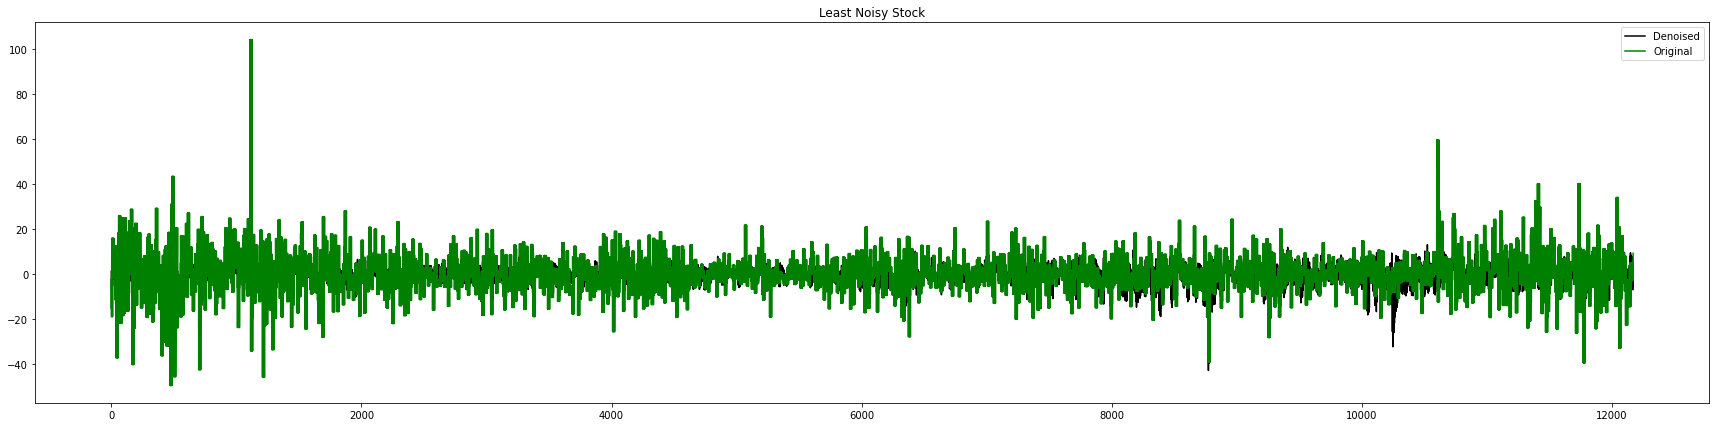

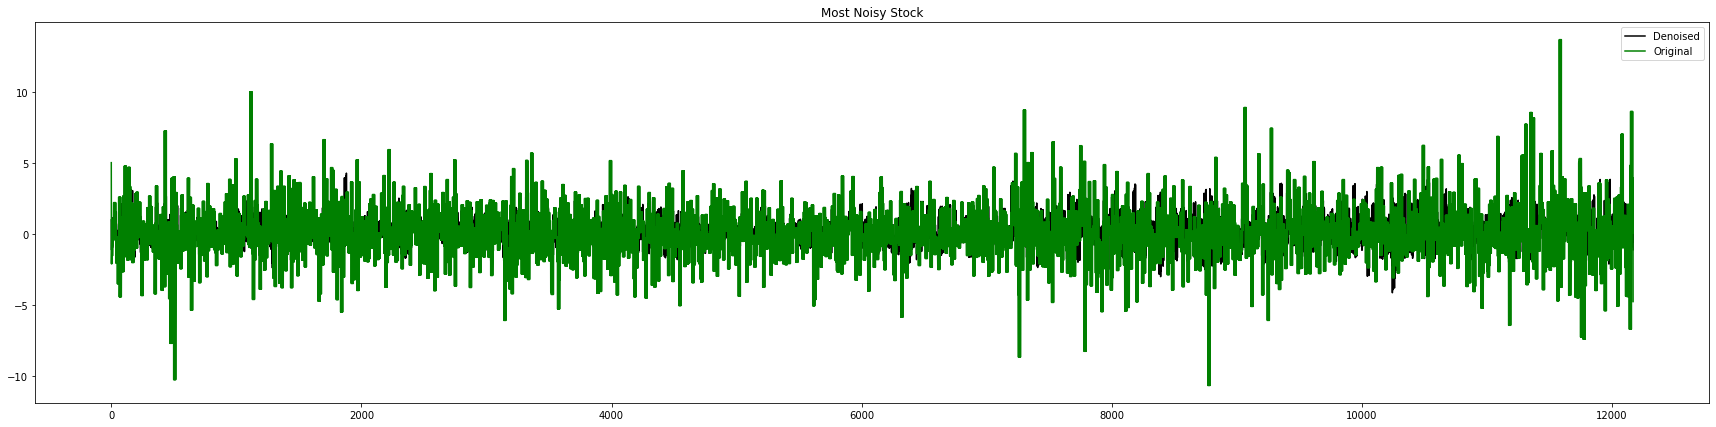

In [0]:
d_1=np.reshape(Data,(-1,Data.shape[2]))
d_2=np.reshape(decoded_data,(-1,Data.shape[2]))
d_1=scaler.inverse_transform(d_1)
d_2=scaler.inverse_transform(d_2)
rep_data=d_2-d_1
sim=np.linalg.norm(rep_data,axis=0,ord=2)
ind=np.argsort(sim)+1
print(str(ind))
print(str(sim[ind-1]))


#CHECKPOINT: De-noised(Black) vs Original(gold)
plt.figure(figsize=(30,7))
plt.plot(d_2[:,ind[[0]]],'black',label='Denoised')
plt.plot(d_1[:,ind[[0]]],'green',label='Original')
plt.title("Least Noisy Stock",loc='center')
plt.legend()
plt.show()
plt.figure(figsize=(30,7))
plt.plot(d_2[:,ind[[-1]]],'black',label='Denoised')
plt.plot(d_1[:,ind[[-1]]],'green',label='Original')
plt.title("Most Noisy Stock",loc='center')
plt.legend()
plt.show()

In [0]:
hist=model.fit(X_log,X_log,epochs=100,batch_size=20,callbacks=[EarlyStopping(monitor='loss',patience=10,restore_best_weights=True)],shuffle=False)

model=Model(inputs=model.inputs, outputs=model.layers[4].output)
decoded_data=model.predict()

(2441, 10)

[(1708, 20), (733, 20), (1708, 1), (733, 1)]

In [0]:
def Tracker(K):
    
    from sklearn.model_selection import train_test_split
    Y=df["Price_51"]
    Y=np.asarray(Y)

    X=df[df.columns[ind[:K]]]
    X=scaler.fit_transform(X)

    Y=Y.reshape((Y.shape[0],1))
    Y=scaler.fit_transform(Y)

    X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.30,shuffle=False)

    X_train = np.reshape(X_train, (X_train.shape[0], X.shape[1],1))
    X_test = np.reshape(X_test, (X_test.shape[0], X.shape[1], 1))

    model=Sequential()
    model.add(LSTM(80,activation='relu',input_shape=(X_train.shape[1],X_train.shape[2]),kernel_regularizer=regularizers.l1(1e-4),return_sequences=True))
    model.add(TimeDistributed(Dropout(0.2)))
    model.add(SimpleRNN(50,activation='relu',input_shape=(X_train.shape[1], X_train.shape[2]),kernel_regularizer=regularizers.l1(1e-4)))
    model.add(Dense(1))

    #opt = keras.optimizers.Adam(learning_rate=0.001,decay=1e-5)
    opt = keras.optimizers.RMSprop(learning_rate=0.0001)

    model.compile(loss="mse",optimizer=opt)

    history=model.fit(X_train, y_train, epochs=100 ,batch_size=20, validation_data=(X_test,y_test),callbacks=[EarlyStopping(monitor='val_loss',patience=10,min_delta=0.0001,restore_best_weights=True)])
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_predict = scaler.inverse_transform(train_predict)
    Y_train = scaler.inverse_transform(y_train)
    test_predict = scaler.inverse_transform(test_predict)
    Y_test = scaler.inverse_transform(y_test)
    predicted=np.concatenate((train_predict,test_predict))

##tracker(black) vs benchmark(blue) in the testing phase
    plt.figure(figsize=(20,7))
    plt.plot(df.index[-Y_test.shape[0]:],test_predict,'black',label='Tracker')
    plt.plot(df.index[-Y_test.shape[0]:],Y_test,'blue',label='Benchmark')
    plt.title("Tracker vs Benchmark(Validation Phase)")
    plt.legend()
    plt.show()
    plt.figure(figsize=(20,7))
    plt.plot(df.index, predicted,'black',label='Tracker')
    plt.plot(df.index, df["Price_51"], 'blue',label='Benchmark')
    plt.title("Tracker vs Benchmark(Training+Validation Phase)")
    plt.vlines(df.index[-y_test.shape[0]],np.min(df['Price_51']),np.max(df["Price_51"]),colors='red',linestyles='dashed')
    plt.legend()
    plt.show()

Train on 1708 samples, validate on 733 samples
Epoch 1/100
1708/1708 [==============================] - 1s 747us/step - loss: 0.1034 - val_loss: 0.1605
Epoch 2/100
1708/1708 [==============================] - 1s 371us/step - loss: 0.0597 - val_loss: 0.1028
Epoch 3/100
1708/1708 [==============================] - 1s 371us/step - loss: 0.0551 - val_loss: 0.0823
Epoch 4/100
1708/1708 [==============================] - 1s 366us/step - loss: 0.0511 - val_loss: 0.0716
Epoch 5/100
1708/1708 [==============================] - 1s 352us/step - loss: 0.0470 - val_loss: 0.0621
Epoch 6/100
1708/1708 [==============================] - 1s 364us/step - loss: 0.0431 - val_loss: 0.0498
Epoch 7/100
1708/1708 [==============================] - 1s 378us/step - loss: 0.0399 - val_loss: 0.0410
Epoch 8/100
1708/1708 [==============================] - 1s 384us/step - loss: 0.0363 - val_loss: 0.0392
Epoch 9/100
1708/1708 [==============================] - 1s 361us/step - loss: 0.0333 - val_loss: 0.0312
Epoch 10

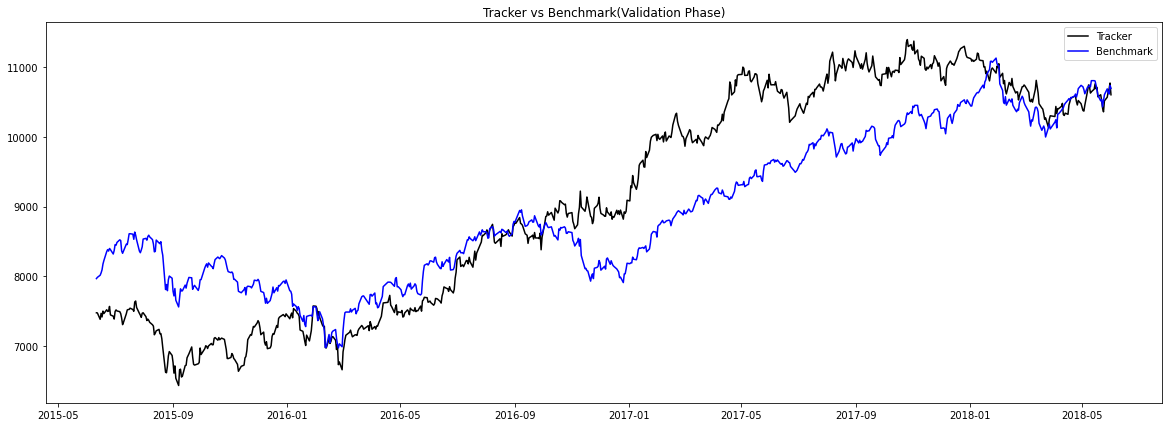

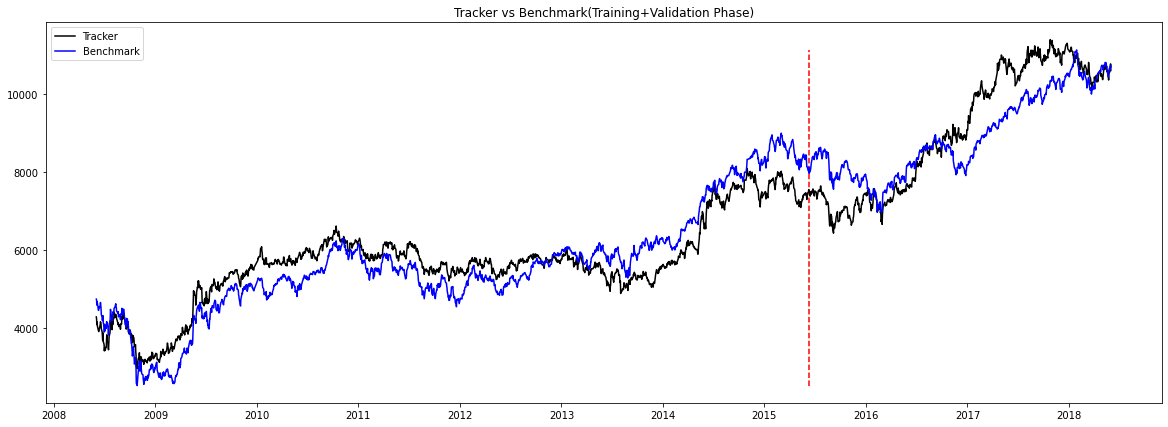

In [148]:
Tracker(5)

Train on 1708 samples, validate on 733 samples
Epoch 1/100
1708/1708 [==============================] - 2s 902us/step - loss: 0.1455 - val_loss: 0.2478
Epoch 2/100
1708/1708 [==============================] - 1s 565us/step - loss: 0.0598 - val_loss: 0.1043
Epoch 3/100
1708/1708 [==============================] - 1s 606us/step - loss: 0.0487 - val_loss: 0.0611
Epoch 4/100
1708/1708 [==============================] - 1s 587us/step - loss: 0.0428 - val_loss: 0.0450
Epoch 5/100
1708/1708 [==============================] - 1s 575us/step - loss: 0.0391 - val_loss: 0.0460
Epoch 6/100
1708/1708 [==============================] - 1s 606us/step - loss: 0.0364 - val_loss: 0.0403
Epoch 7/100
1708/1708 [==============================] - 1s 585us/step - loss: 0.0337 - val_loss: 0.0372
Epoch 8/100
1708/1708 [==============================] - 1s 634us/step - loss: 0.0312 - val_loss: 0.0368
Epoch 9/100
1708/1708 [==============================] - 1s 572us/step - loss: 0.0288 - val_loss: 0.0358
Epoch 10

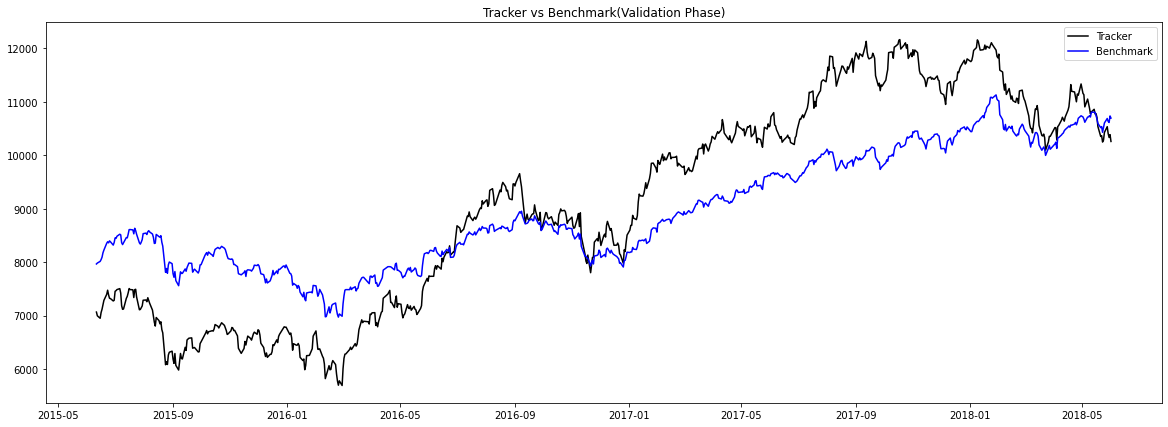

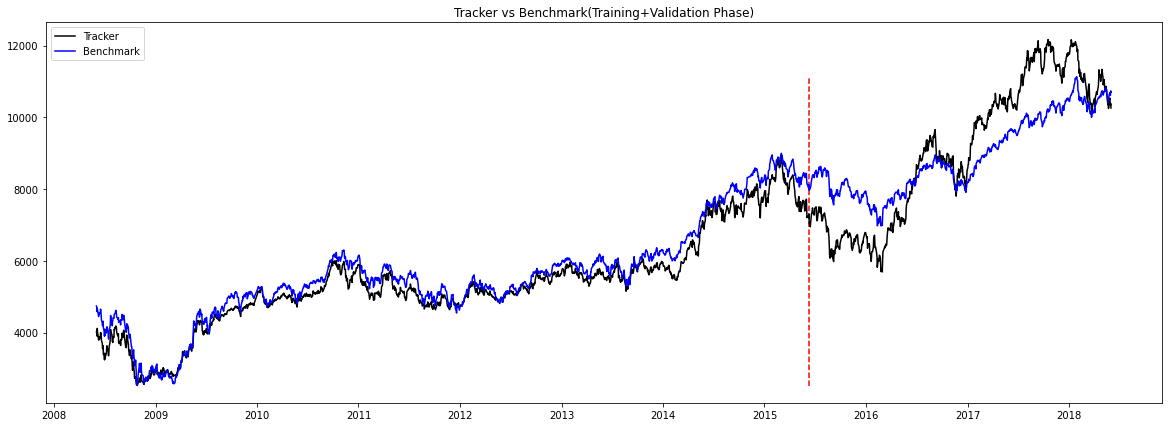

In [149]:
Tracker(10)

Train on 1708 samples, validate on 733 samples
Epoch 1/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.1046 - val_loss: 0.0601
Epoch 2/100
1708/1708 [==============================] - 2s 986us/step - loss: 0.0445 - val_loss: 0.0442
Epoch 3/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.0397 - val_loss: 0.0455
Epoch 4/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.0366 - val_loss: 0.0443
Epoch 5/100
1708/1708 [==============================] - 2s 999us/step - loss: 0.0338 - val_loss: 0.0400
Epoch 6/100
1708/1708 [==============================] - 2s 998us/step - loss: 0.0311 - val_loss: 0.0374
Epoch 7/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.0285 - val_loss: 0.0347
Epoch 8/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.0262 - val_loss: 0.0310
Epoch 9/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.0239 - val_loss: 0.0291
Epoch 10/100
1708/17

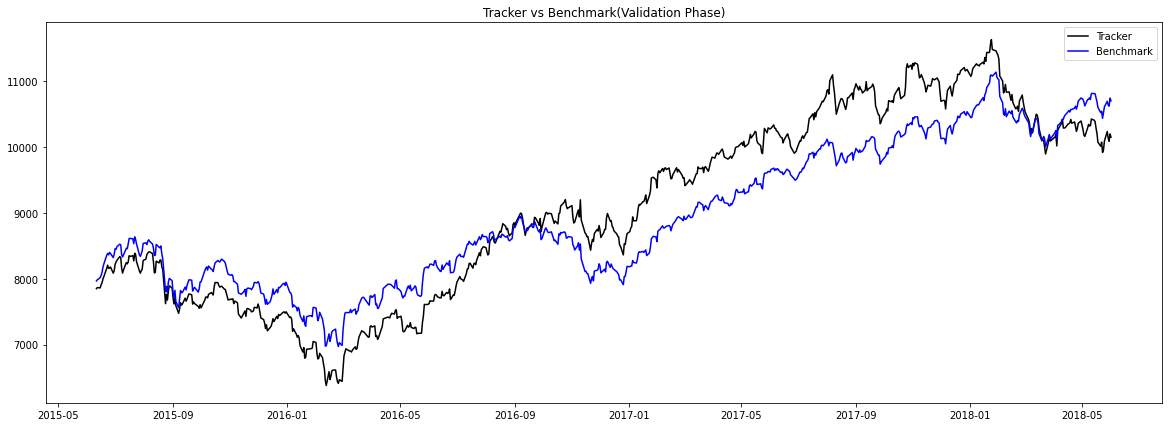

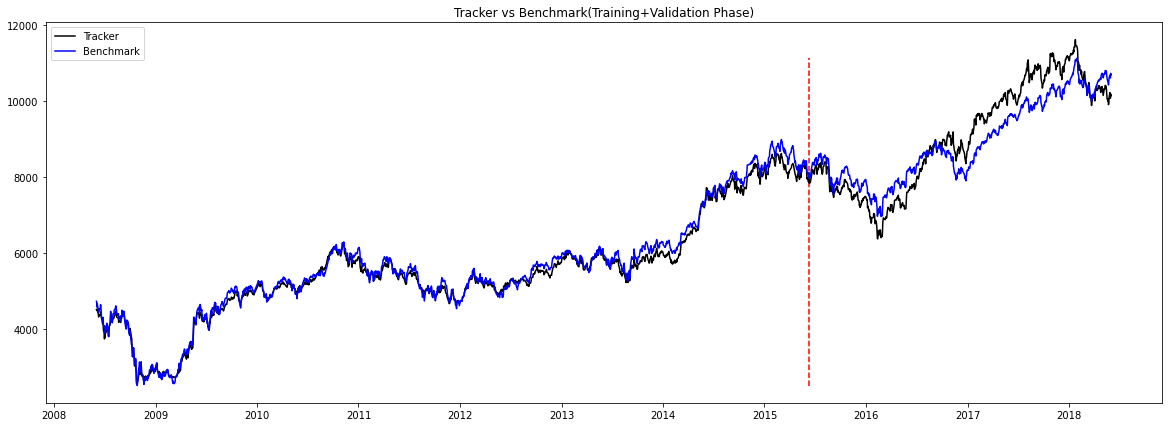

In [150]:
Tracker(20)

Train on 1708 samples, validate on 733 samples
Epoch 1/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.1020 - val_loss: 0.0681
Epoch 2/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.0454 - val_loss: 0.0417
Epoch 3/100
1708/1708 [==============================] - 3s 1ms/step - loss: 0.0404 - val_loss: 0.0387
Epoch 4/100
1708/1708 [==============================] - 3s 1ms/step - loss: 0.0373 - val_loss: 0.0372
Epoch 5/100
1708/1708 [==============================] - 2s 1ms/step - loss: 0.0345 - val_loss: 0.0335
Epoch 6/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.0319 - val_loss: 0.0314
Epoch 7/100
1708/1708 [==============================] - 3s 1ms/step - loss: 0.0293 - val_loss: 0.0318
Epoch 8/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.0269 - val_loss: 0.0259
Epoch 9/100
1708/1708 [==============================] - 3s 2ms/step - loss: 0.0246 - val_loss: 0.0239
Epoch 10/100
1708/1708 [==

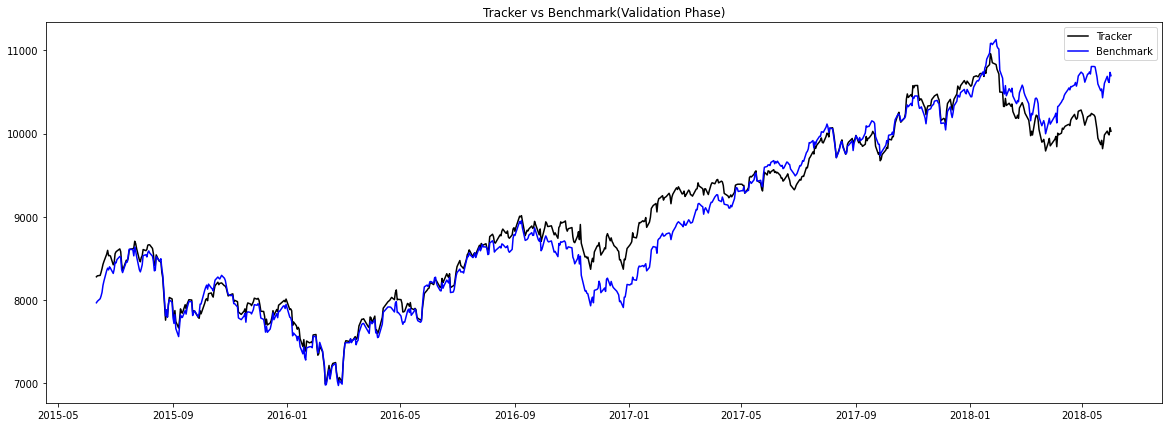

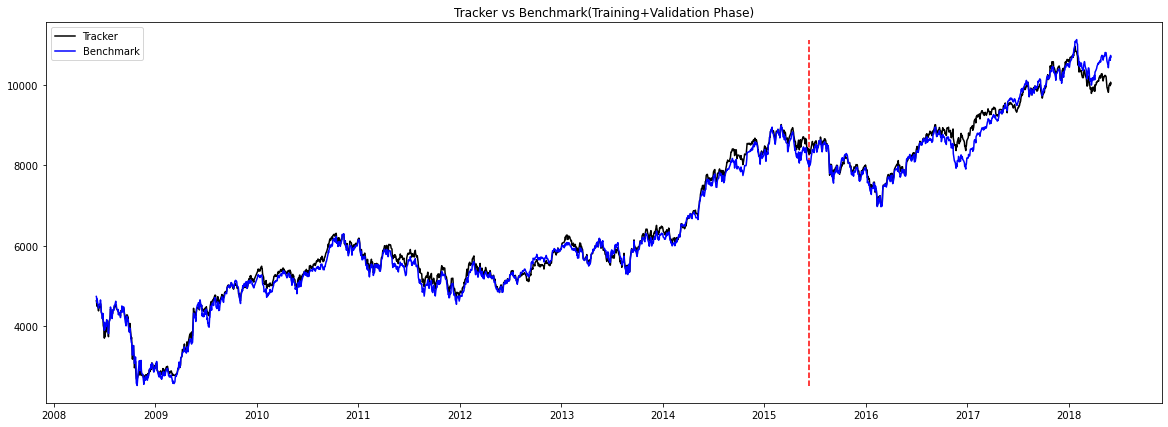

In [151]:
Tracker(30)